In [1]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA


#from mpl_toolkits.mplot3d import Axes3D
#import matplotlib.pyplot as plt
#import numpy as np
from itertools import product, combinations
#from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


In [2]:
# draw a vector
class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)


In [52]:
# draw sphere

#u, v = np.mgrid[0:2*np.pi:160j, 0:np.pi:20j]
#u, v = np.mgrid[0:2*np.pi:160j, 0:np.pi:20j]
pix_x = 160
pix_y = 20
u, v = np.mgrid[-np.pi:np.pi:160j,-np.pi/2 :np.pi/2:20j]
x1 = np.array(np.cos(u)*np.sin(v+np.pi/2))
y1 = np.array(np.sin(u)*np.sin(v+np.pi/2))
z1 = np.array(np.cos(v+np.pi/2))
x = np.array(np.cos(u)*np.sin(v+np.pi/2)).flatten()
y = np.array(np.sin(u)*np.sin(v+np.pi/2)).flatten()
z = np.array(np.cos(v+np.pi/2)).flatten()


In [53]:
len(x)

3200

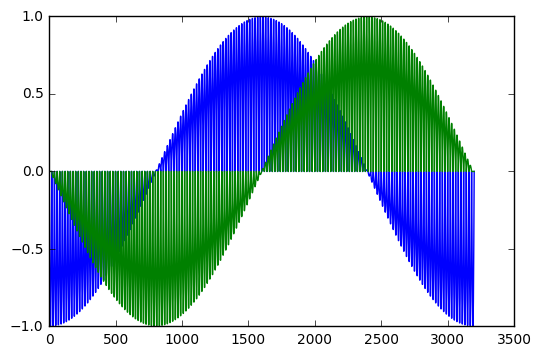

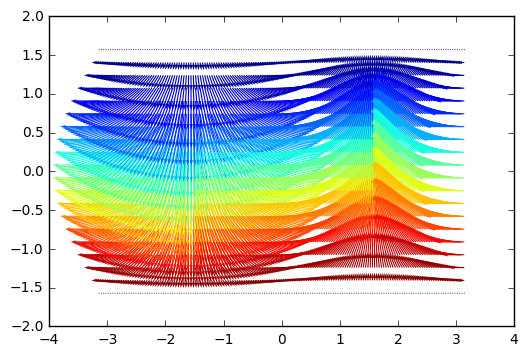

In [54]:
# Plot x, y values, sanity check
t = np.arange(len(z))
plotx = plt.plot(t,x, t,y)
plt.show()

# print(u.shape, u)
# print(v.shape, v)
plt.figure()
q= plt.quiver(u,v,x1,y1,z1, scale = 10)
plt.show()

In [55]:
# Include Pos Begin

pos_begin =np.array( [1,0,0])

print(x[1])

-0.164594590281


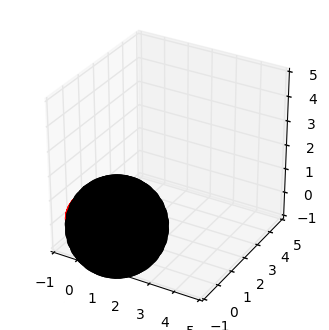

In [56]:
# create 3D vecotr plot
# include pos begin


figVec = True

if figVec == True:
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")
    ax.plot_wireframe(x, y, z, color="r")
    for i in range(1,len(z),1):
        # print(x[i], y[i], z[i])
        a = Arrow3D([pos_begin[0]+x[i], 2*x[i]+pos_begin[0]],
                    [pos_begin[1]+y[i], 2*y[i]+pos_begin[1]], 
                    [pos_begin[2]+z[i],pos_begin[2]+ 2*z[i]], mutation_scale=20,
                lw=1, arrowstyle="-|>", color="k")
        #norm =LA.norm([x[i], y[i], z[i]])
        #print (norm)
        q = ax.add_artist(a)
        ax.set_xlim([-1, 5])
        ax.set_ylim([-1, 5])
        ax.set_zlim([-1,5])
    ax.add_artist(a)
    plt.show()

# Rotation

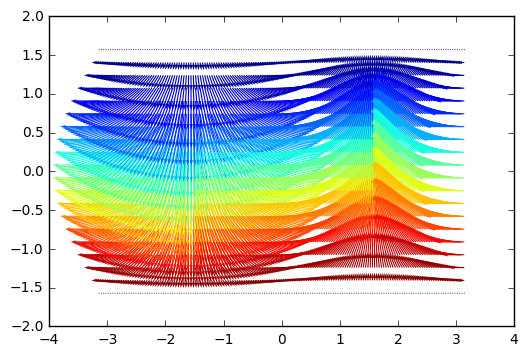

In [57]:
heading=np.pi * 0.3
heading = 0
alpha = np.ones(len(x)) * heading 


pos_rot_X = []
pos_rot_Y = []
pos_rot_Z = []
# print(len(alpha))
# t = np.arange(1, len(alpha)+1)
# print(Xmesh)
# alphaplot = plt.plot(t, (alpha), t, Xmesh.flatten())
# plt.show()
for i in range(len(alpha)):
    alpha_val = alpha[i]
    rot = np.array([np.cos(alpha_val), -np.sin(alpha_val), 0,np.sin(alpha_val), np.cos(alpha_val),0, 0,0,1])
    rot = rot.reshape(3,3)
    mat = np.array([x[i], y[i], z[i]])
    mat_rot = np.dot(rot, mat)
    pos_rot_X.append(mat_rot[0])
    pos_rot_Y.append(mat_rot[1])
    pos_rot_Z.append(mat_rot[2])
# print(mat_rot)
pos_rot =np.vstack([np.array(pos_rot_X), np.array(pos_rot_Y), np.array(pos_rot_Z)])
pos_rot2 = pos_rot.reshape(3,pix_x,pix_y)
#q = plt.quiver(u,v,pos_rot2[0,:,:] , pos_rot2[1,:,:],pos_rot2[2,:,:],  scale = 10)
q = plt.quiver(u,v,pos_rot_X , pos_rot_Y,pos_rot_Z,  scale = 10)
plt.show()


## UNTIL HERE IT IS VALIDATED

In [58]:
## source > http://paulbourke.net/geometry/circlesphere/ 
##source code: http://paulbourke.net/geometry/circlesphere/sphere_line_intersection.py

def sphere_line_intersection(l1, l2, sp, r):

    def square(f):
        return f * f
    from math import sqrt

    # l1[0],l1[1],l1[2]  P1 coordinates (point of line)
    # l2[0],l2[1],l2[2]  P2 coordinates (point of line)
    # sp[0],sp[1],sp[2], r  P3 coordinates and radius (sphere)
    # x,y,z   intersection coordinates
    #
    # This function returns a pointer array which first index indicates
    # the number of intersection point, followed by coordinate pairs.

    p1 = p2 = None

    a = square(l2[0] - l1[0]) + square(l2[1] - l1[1]) + square(l2[2] - l1[2])
    b = 2.0 * ((l2[0] - l1[0]) * (l1[0] - sp[0]) +
               (l2[1] - l1[1]) * (l1[1] - sp[1]) +
               (l2[2] - l1[2]) * (l1[2] - sp[2]))

    c = (square(sp[0]) + square(sp[1]) + square(sp[2]) + square(l1[0]) +
            square(l1[1]) + square(l1[2]) -
            2.0 * (sp[0] * l1[0] + sp[1] * l1[1] + sp[2] * l1[2]) - square(r))

    i = b * b - 4.0 * a * c

    if i < 0.0:
        pass  # no intersections
    elif i == 0.0:
        # one intersection
        p[0] = 1.0

        mu = -b / (2.0 * a)
        p1 = (l1[0] + mu * (l2[0] - l1[0]),
              l1[1] + mu * (l2[1] - l1[1]),
              l1[2] + mu * (l2[2] - l1[2]),
              )

    elif i > 0.0:
        # first intersection
        mu = (-b + sqrt(i)) / (2.0 * a)
        p1 = (l1[0] + mu * (l2[0] - l1[0]),
              l1[1] + mu * (l2[1] - l1[1]),
              l1[2] + mu * (l2[2] - l1[2]),
              )

        # second intersection
        mu = (-b - sqrt(i)) / (2.0 * a)
        p2 = (l1[0] + mu * (l2[0] - l1[0]),
              l1[1] + mu * (l2[1] - l1[1]),
              l1[2] + mu * (l2[2] - l1[2]),
              )

    return p1, p2

In [59]:
# Define sphere and begin position, velocity
#pos_begin = np.array([0,0,0])
spx= [2,-5]#, 3, 2]
spy= [2,-3]#, -2, 2]
spz= [2,-6]#, 3, -2]
rsp = [0.5,0.5]#, 0.5, 0.5]
V = [-1,1,0]

In [60]:
# Distance to intersection point

def distance_intersection(p1,p2,l2):
    distance=[] 
    distance2 = []
    #print (p1,l2)
    if p1!=None:
        
        
        #distance_p1 = np.sqrt(np.sum(np.array(p1)**2))
        #distance.append(np.sqrt(np.sum(np.array(p1)**2)))
        #distCalc = p1 - l2
        distance.append(LA.norm(np.array(np.array(p1)-l2)))
        #print(LA.norm(np.array(p1)), np.sqrt(np.sum(np.array(p1)**2)))
    if p2!=None:
    
        
        #distance_p2 = np.sqrt(np.sum(np.array(p2)**2)) 
        #distance.append(np.sqrt(np.sum(np.array(p2)**2)) )
        
        distance.append(LA.norm(np.array(np.array(p2)-l2)))
    if len(distance)>0:
        distance2= np.min(distance)
    #print (distance2)
    return distance2

def estimateDistance(spx, spy, spz, rsp, pos_rot_X,pos_rot_Y, pos_rot_Z, pos_begin, noInter, V):
    d_store= []
    d_pos = []
    d_vec=[]
    i_loc=[]
    d_pos2 = []
    OF_pix = []
    OF_x= []
    OF_y = []
    OF_z = []
    for i in range (len(pos_rot_X)):
        #l2 =np.array( [pos_rot_X[i], pos_rot_Y[i], pos_rot_Z[i]])
        l2 = np.array([pos_rot_X[i] + pos_begin[0], pos_rot_Y[i]+pos_begin[1], pos_rot_Z[i]+pos_begin[2]])
        #print (l2)
        #print (l2)
        l1 = pos_begin
        #print(l1)
        for j in range(len(spx)):
            #this takes the unit vector of one pixel, and finds its intersection point with a sphere
            p1, p2 = sphere_line_intersection(pos_begin,  # begin position
                            l2,#[pos_rot_X[i], pos_rot_Y[i], pos_rot_Z[i]], #unit vector
                            [spx[j], spy[j], spz[j]], # sphere coordinates
                                              rsp[j]) # radius sphere
            # This computes the minimum distance to the sphere for one sphere
            #print(p1, p2)
            if p1!=None or p2!=None:
                #d_vec = []
                p1Vec =  np.array(p1) - pos_begin
                p2Vec =  np.array(p2) - pos_begin
                l2Vec = l2 - pos_begin
                #print(spx[j], spy[j], spz[j])
                #print ('p1',p1Vec,'p2', p2Vec,'l2', l2Vec)
                if (np.sum((p1Vec >= 0 )*1-(l2Vec>= 0)*1)) == 0:
                    d_vec.append(distance_intersection(p1, p2, l2))
                if (np.sum((p1Vec >= 0 )*1-(l2Vec>= 0)*1)) == 0:
                    d_vec.append(distance_intersection(p1, p2, l2))
                #print (d_vec)
     
        if d_vec== []:
            d_store.append(noInter)
            d_pos.append(l2)
            OF_pix.append([0,0,0])
            OF_x.append(0)
            OF_y.append(0)
            OF_z.append(0)
        if d_vec!= [] :
            D = np.min(d_vec)
            d_store.append(np.min(d_vec))
            d_pos.append(l2)
            d_vec=[]
            OF = np.divide(V - np.multiply(np.dot(V,l2),l2), D)
            OF_x.append(OF[0])
            OF_y.append(OF[1])
            OF_z.append(OF[2])
            #print(OF)
            OF_pix.append(OF)
    OF_pix = np.vstack((np.array(OF_x), np.array(OF_y), np.array(OF_z)))
    return d_store, OF_pix, OF_x, OF_y, OF_z



#Figure out how to plot OF, since now you have flattened it all, and stores it as a list of arrays [x,y,z] 
# if you want to plot it you might want to store it in x, y, z, seperately and then reshape etc. 
distances, OF_pix, xOF, yOF, zOF= estimateDistance(spx, spy, spz, rsp, pos_rot_X,pos_rot_Y, pos_rot_Z, pos_begin, False, V)
#print(len(distances))
#print(len(x))
#print(len(OF_pix))
#print(type(OF_pix))
#OF_pix2 =np.array(OF_pix) 
print(np.shape(np.array(OF_pix)))

OF2 = OF_pix.reshape(3,pix_x,pix_y)

print(np.shape(OF2))

(3, 3200)
(3, 160, 20)


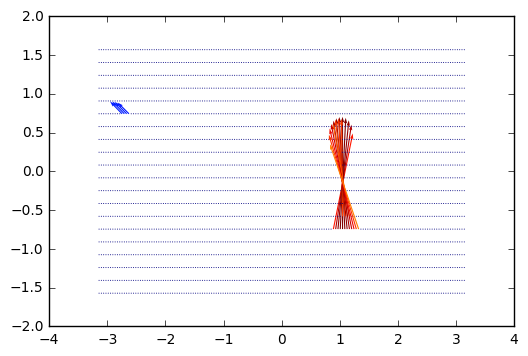

In [61]:
# Xmesh,Ymesh = np.meshgrid(xx,yy)
# XPos = OF2[0,:,:]
# YPos = OF2[1,:,:]
# ZPos = OF2[2,:,:]
q = plt.quiver(u,v, OF2[0,:,:], OF2[1,:,:],
                #              OF2[2,:,:] , 
                np.linalg.norm(OF2[:,:,:],axis=0)/100 , 
               scale = 4)
plt.show()

In [62]:
len(xOF)

3200

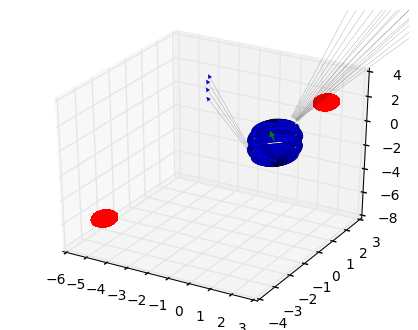

In [65]:
# create 3D vecotr plot

figVec = True
# xOF= np.array(OF2[0,:,:])
# yOF=np.array(OF2[1,:,:])
# zOF = np.array(OF2[0,:,:])

if figVec == True:
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")
    #ax.plot_wireframe(x, y, z, color="r")
    for i in range(1,len(xOF),1):
#         a = Arrow3D([x[i], xOF[i]], [y[i], yOF[i]], [z[i], zOF[i]], mutation_scale=50,
#                 lw=1, arrowstyle="-|>")#, color="k")
        k = 100#00
        a = Arrow3D([pos_begin[0]+x[i], pos_begin[0]+x[i]
                     + xOF[i]*k], 
                    [pos_begin[1]+y[i],y[i]+pos_begin[1]+ yOF[i]*k],
                    [pos_begin[2]+z[i] ,pos_begin[2]+ zOF[i]*k] +z[i],
                    mutation_scale=10,
            lw=0.5, arrowstyle="-|>")#, color="k")
        
#         a = Arrow3D([pos_begin[0], pos_begin[0]+ xOF[i]*k], 
#                     [pos_begin[1],pos_begin[1]+ yOF[i]*k],
#                     [pos_begin[2] ,pos_begin[2]+ zOF[i]*k],
#                     mutation_scale=10,
#             lw=1, arrowstyle="-|>")#, color="k")
    #norm =LA.norm([x[i], y[i], z[i]])
        #print (norm)
        q = ax.add_artist(a)
#         k = 3
#         ax.set_xlim([-0.20*k, 0.20*k])
#         ax.set_ylim([-0.20*k, 0.20*k])
#         ax.set_zlim([-0.20*k,0.20*k])
    a = Arrow3D([pos_begin[0], pos_begin[0]+V[0]], 
                [pos_begin[1],pos_begin[1]+ V[1]],
                [pos_begin[2],pos_begin[2]+V[2]], mutation_scale=10,lw=1, arrowstyle="-|>", color="g")
    q = ax.add_artist(a)
    for i in range(len(rsp)):
 
        u1, v1 = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        # x = np.cos(u)*np.sin(v)
        # y = np.sin(u)*np.sin(v)
        # z = np.cos(v)
        r = rsp[i]
        center_x = spx[i]
        center_y = spy[i]
        center_z = spz[i]
        x2 = r * np.outer(np.cos(u1), np.sin(v1)) + center_x
        y2 = r * np.outer(np.sin(u1), np.sin(v1)) + center_y
        z2 = r * np.outer(np.ones(np.size(u1)), np.cos(v1)) + center_z
        q = ax.plot_wireframe(x2, y2, z2, color="r")
    #ax.add_artist(a)
    plt.show()

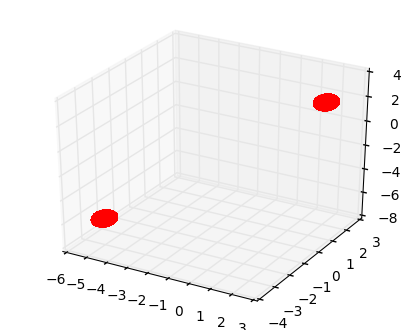

In [15]:
# # draw sphere
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.set_aspect("equal")
# for i in range(len(rsp)):
 
#     u1, v1 = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
#     # x = np.cos(u)*np.sin(v)
#     # y = np.sin(u)*np.sin(v)
#     # z = np.cos(v)
#     r = rsp[i]
#     center_x = spx[i]
#     center_y = spy[i]
#     center_z = spz[i]
#     x = r * np.outer(np.cos(u1), np.sin(v1)) + center_x
#     y = r * np.outer(np.sin(u1), np.sin(v1)) + center_y
#     z = r * np.outer(np.ones(np.size(u1)), np.cos(v1)) + center_z
#     q = ax.plot_wireframe(x, y, z, color="r")
#     plt.hold(True)
# plt.show()